<a href="https://colab.research.google.com/github/Devsthink/BBVA-DATA-DRIVEN/blob/main/Final__BBVA_Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hackaton BBVA


# Modelo de prediccion de valorizacion de inmuebles

Librerias necesarias para creacion de modelo



*   Manejo de arreglos en diferentes dimensiones
*   Cargar y exportar datos
*   Redes Neuronales
*   Ubicaciones geograficas





# Obtención de datos

*   Carga de datos a variable local



In [649]:
!pip install folium
!pip install -U scikit-learn
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [650]:
import pandas as pd
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
import keras
from time import time

# Arquitectura de la red
from keras import models
from keras import layers
from keras import optimizers
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Carga de los archivos desde un repositorio remoto:

In [700]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [743]:
#path = '/content/drive/MyDrive/BBVA_Hackaton/Train_Data_BBVA.csv'
path = '/content/drive/MyDrive/BBVA_Hackaton/Train_Data_BBVA.csv'

In [703]:
df = pd.read_csv(path)
df.head()

,Fecha entrega del Informe,Tipo de via,Piso,Departamento,Provincia,Distrito,Numero de estacionamiento,Depositos,Latitud,Longitud,Categoria del bien,Posicion,Numero de frentes,Edad,Elevador,Estado de conservacion,Metodo Representado,Area Terreno,Area Construccion,Valor comercial
0,2021,1,-1,Lima,Lima,Surquillo,0,0,-12.1056,-77.0257,Departamento,-1,-1,5,-1,Bueno,Comparacion de mercado (directo),13.72,63.92,138169.0
1,2017,1,-1,Lima,Lima,Santiago de Surco,1,0,-12.1381,-76.9857,Departamento,-1,-1,4,-1,Muy bueno,Comparacion de mercado (directo),32.93,111.12,203712.0
2,2019,1,-1,Lima,Lima,San Miguel,1,1,-12.0763,-77.0909,Oficina,-1,-1,5,-1,Bueno,Comparacion de mercado (directo),5.09,106.22,145911.0
3,2019,3,-1,Ucayali,Coronel Portillo,Calleria,-1,-1,-8.3814,-74.5379,Terreno Urbano,-1,-1,-1,-1,No especificado,Costos o reposicion (directo),329.50,0.00,180275.0
4,2020,3,-1,Lima,Lima,Magdalena del Mar,0,0,-12.0914,-77.0559,Oficina,-1,-1,0,-1,En proyecto,Comparacion de mercado (directo),3.16,57.77,105719.0


# *Descripción de datos*

*   Distinción de valores numericos y no numericos
*   Rangos entre cada variable




In [704]:
#Valores descriptivos de dataset
df.describe()

,Fecha entrega del Informe,Tipo de via,Numero de estacionamiento,Depositos,Latitud,Longitud,Numero de frentes,Edad,Elevador,Area Terreno,Area Construccion,Valor comercial
count,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,1.935900e+04,19359.000000,1.935900e+04
mean,2018.594452,1.948035,0.691926,0.199545,-11.403929,-76.868540,0.730926,14.781342,-0.995093,7.034578e+03,205.114399,3.205846e+05
std,1.526584,1.050185,24.852638,2.323378,2.405346,7.173456,0.601742,39.362099,0.105273,1.078874e+05,543.558550,7.125359e+05
min,2014.000000,-1.000000,-1.000000,-1.000000,-18.209200,-760.857900,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,2.389000e+03
25%,2018.000000,1.000000,0.000000,0.000000,-12.118300,-77.063000,0.000000,1.000000,-1.000000,1.612500e+01,72.025000,1.025665e+05
50%,2019.000000,2.000000,0.000000,0.000000,-12.081400,-77.019000,1.000000,6.000000,-1.000000,5.764000e+01,111.350000,1.711750e+05
75%,2020.000000,3.000000,1.000000,0.000000,-11.951200,-76.946900,1.000000,21.000000,-1.000000,2.000000e+02,217.890000,3.115530e+05
max,2022.000000,10.000000,2424.000000,200.000000,-3.437000,-12.061300,3.000000,2018.000000,2.000000,7.571536e+06,42171.800000,3.350381e+07


In [705]:
#Numero de registros y valores a tomar en cuenta
df.shape

(19359, 20)

In [706]:
df.dtypes

Fecha entrega del Informe      int64
Tipo de via                    int64
Piso                          object
Departamento                  object
Provincia                     object
Distrito                      object
Numero de estacionamiento      int64
Depositos                      int64
Latitud                      float64
Longitud                     float64
Categoria del bien            object
Posicion                      object
Numero de frentes              int64
Edad                           int64
Elevador                       int64
Estado de conservacion        object
Metodo Representado           object
Area Terreno                 float64
Area Construccion            float64
Valor comercial              float64
dtype: object

## Conteo de valores 
Numero de itereaciones por cada valor distinto en variables

In [707]:
df['Tipo de via'].value_counts()

 1     8884
 3     5392
 2     4108
 4      526
 5      420
 9       20
 7        4
-1        2
 10       2
 6        1
Name: Tipo de via, dtype: int64

In [708]:
df['Piso'].value_counts()

1              5176
9              3517
6              3121
5              1708
3              1329
EDIF 2         1025
1ER PISO       1016
tercer piso     895
SEGUNDO         490
4to             416
7               390
-1              276
Name: Piso, dtype: int64

In [709]:
df['Departamento'].value_counts()

Lima             13420
La Libertad        787
Arequipa           644
Piura              504
Lambayeque         479
Junin              473
San Martin         445
Huancavelica       441
Callao             394
Loreto             383
ancash             282
Cusco              254
Ucayali            218
Huanuco            157
Cajamarca          132
Tacna               88
Puno                67
Pasco               51
Tumbes              50
Ayacucho            46
Apurimac            22
Moquegua            11
Madre de Dios        6
Amazonas             5
Name: Departamento, dtype: int64

In [710]:
df['Estado de conservacion'].value_counts()

Bueno              8397
No especificado    5227
Regular            2146
Muy bueno          1511
En construccion    1453
En proyecto         512
Malo                113
Name: Estado de conservacion, dtype: int64

In [711]:
df['Provincia'].value_counts()

Lima                     12828
Trujillo                   694
Arequipa                   619
Chiclayo                   425
Prov Const del Callao      394
                         ...  
Camana                       1
Tayacaja                     1
Bagua                        1
Jauja                        1
Huari                        1
Name: Provincia, Length: 113, dtype: int64

In [712]:
df['Categoria del bien'].value_counts()

Departamento            9483
Vivienda Unifamiliar    4835
Local Comercial         2311
Terreno Urbano          2221
Oficina                  509
Name: Categoria del bien, dtype: int64

In [713]:
df['Metodo Representado'].value_counts()

Comparacion de mercado (directo)      11631
Costos o reposicion (directo)          7707
Renta o capitalizacion (indirecto)       20
No Espeficidado                           1
Name: Metodo Representado, dtype: int64

In [714]:
df['Latitud'].value_counts()

-11.9278    152
-11.9338     57
-12.0792     54
-12.0750     46
-12.0895     46
           ... 
-11.9812      1
-3.7484       1
-9.0924       1
-14.0677      1
-3.5571       1
Name: Latitud, Length: 6953, dtype: int64

In [715]:
df['Longitud'].value_counts()

-77.0572    156
-77.0607     59
-77.0290     51
-77.0385     48
-77.0600     45
           ... 
-79.3385      1
-77.1176      1
-74.2189      1
-71.5721      1
-80.4424      1
Name: Longitud, Length: 6753, dtype: int64

#Direcciones especificas

Se pretende utilizar la localización para agregar peso y valor a la funcion de calculo

In [716]:
directions = []
geolocalizador = Nominatim(user_agent="GetLoc");
#Se recorren todos los valores para obtener su direccion
for i in range(len(df)):
    direction = geolocalizador.reverse(str(df.at[i,"Latitud"]) + ',' + str(df.at[i,"Longitud"]))



    directions.append(direction) #Se agrega a la lista

    

KeyboardInterrupt: ignored

In [ ]:
#Se muestra la lista de direcciones
arr_directions = np.array(directions)
print(arr_directions)

#Rango de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28db9d8dd0>,
      dtype=object)

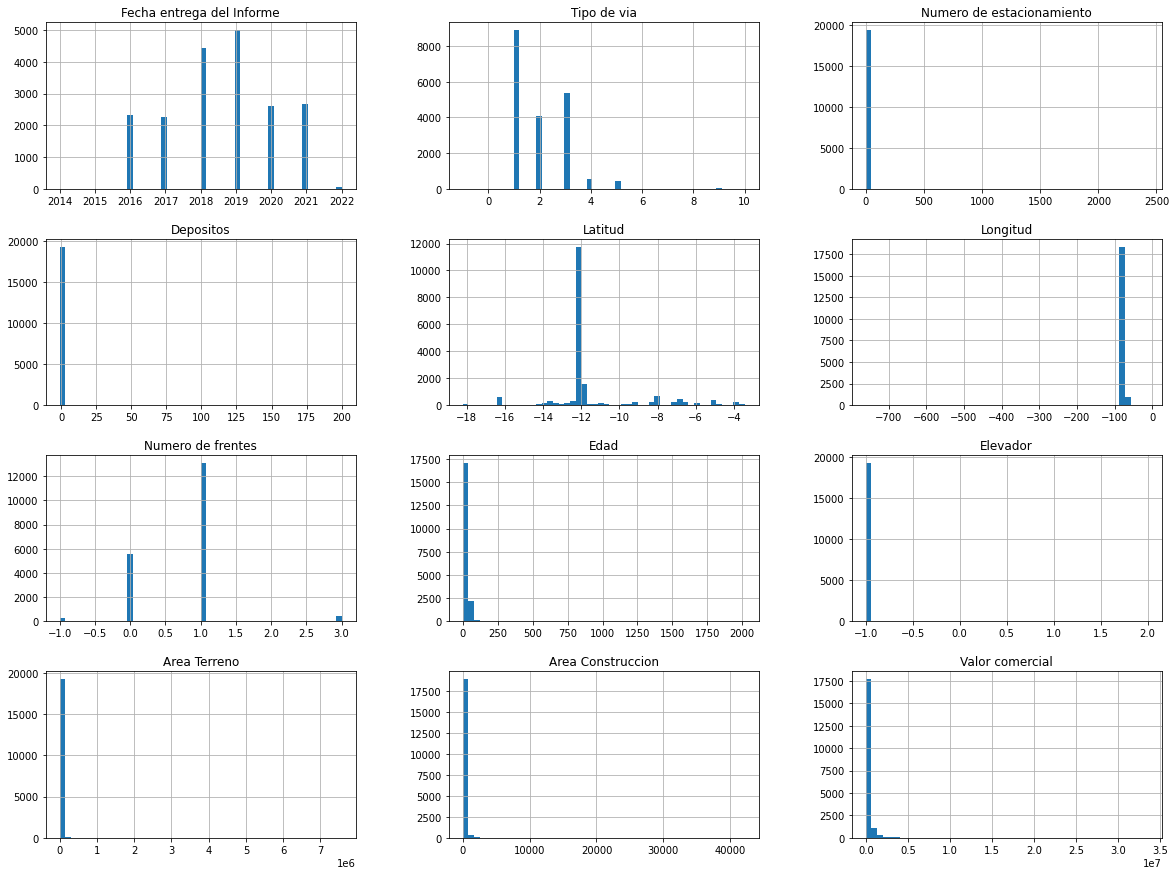

In [717]:
df.hist(bins=50, figsize=(20,15))

# Mapeo de las propiedades (no cul, sin mapa, no jala chido)

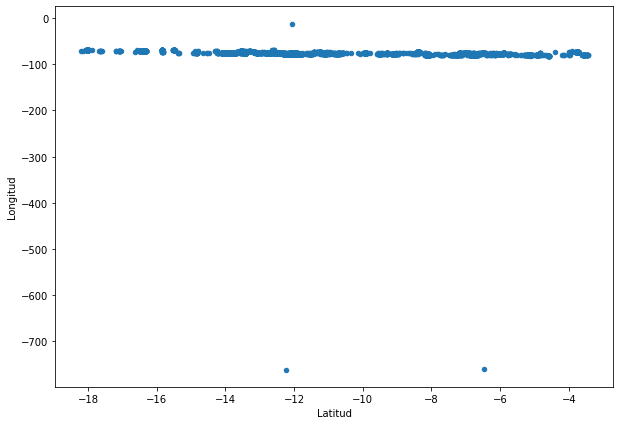

In [ ]:
#grafica de dispersion en X, Y
df.plot(kind="scatter", x="Latitud", y="Longitud", figsize=(10,7))

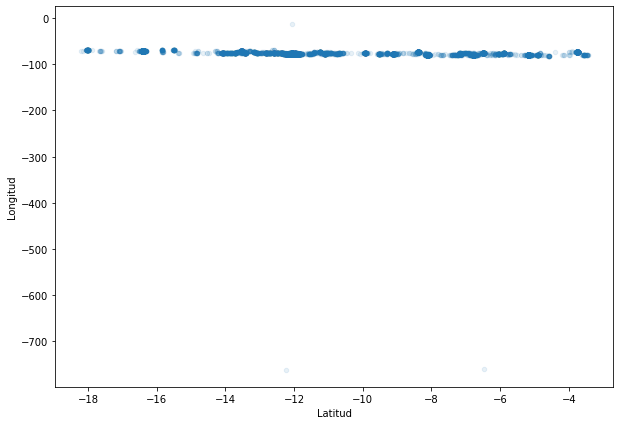

In [ ]:
#grafica de dispersion en X, Y con alfa para ver donde hay mayor densidad
df.plot(kind="scatter", x="Latitud", alpha=0.1, y="Longitud", figsize=(10,7))

In [ ]:
#cambiamos el tamaño del punto y agregamos una escala de medicion
#s tamaño de cada punto
#c etiqueta


#df.plot(kind="scatter", x="Latitud", alpha=0.1, y="Longitud", figsize=(10,7),
 #       s=df['Valor comercial'], c='median_house_value')

# Mapeo con follium

In [ ]:
import folium
#x="Latitud (Decimal)", y="Longitud (Decimal)"
mapa=folium.Map(location=[-12.057158, -77.048902], zoom_start=6 )
mapa

In [ ]:
distritos= df[ ['Latitud','Longitud']].to_numpy()
distritos

array([[-12.1056, -77.0257],
       [-12.1381, -76.9857],
       [-12.0763, -77.0909],
       ...,
       [-12.0812, -77.0932],
       [ -6.7725, -79.8611],
       [-12.102 , -76.9657]])

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

HeatMap (distritos,radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)
mapa

ValueError: ignored

# Correlacion de variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28de735150>,
      dtype=object)

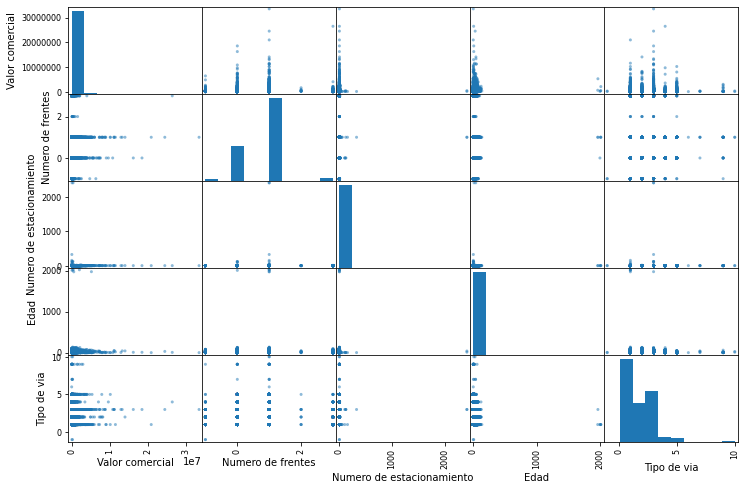

In [718]:
#diagramas de coorelacion, se me ocurre que sea de todas las variables contra todas
from pandas.plotting import scatter_matrix
atributos=["Valor comercial","Piso","Provincia","Numero de frentes","Numero de estacionamiento","Edad","Tipo de via","Categoria del bien","Estado de conservacion"]

scatter_matrix(df[atributos], figsize=(12,8))

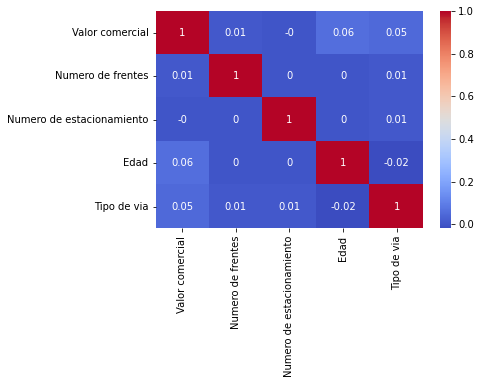

In [719]:
import seaborn as sn

corrMatrix=df[atributos].corr().round(2)
sn.heatmap(corrMatrix, annot=True,cmap='coolwarm')
plt.show()

# Preparar los datos y sus transformaciones

In [720]:
#revisar y eliminar los datos nulos
df.isnull().values.any()

False

In [721]:
#numero de datos
len(df)

19359

# Categorizar(lo haremos nominal)

In [722]:
df['Provincia'].value_counts()

Lima                     12828
Trujillo                   694
Arequipa                   619
Chiclayo                   425
Prov Const del Callao      394
                         ...  
Camana                       1
Tayacaja                     1
Bagua                        1
Jauja                        1
Huari                        1
Name: Provincia, Length: 113, dtype: int64

In [723]:
from sklearn.preprocessing import OneHotEncoder
Nominal_codificador=OneHotEncoder(sparse=False)
Nominal_codificador.fit_transform(df[['Provincia']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [724]:
#nominal
Nominal_codificador.categories_

[array(['Abancay', 'Alto Amazonas', 'Ambo', 'Andahuaylas', 'Anta',
        'Arequipa', 'Ascope', 'Bagua', 'Barranca', 'Bellavista', 'CALLAO',
        'CHICLAYO', 'CHINCHA', 'Cajabamba', 'Cajamarca', 'Calca', 'Camana',
        'Canchis', 'Canete', 'Canta', 'Caraveli', 'Carhuaz', 'Casma',
        'Caylloma', 'Celendin', 'Chachapoyas', 'Chanchamayo', 'Chepen',
        'Chiclayo', 'Chincheros', 'Chota', 'Chucuito', 'Chumbivilcas',
        'Chupaca', 'Concepcion', 'Contralmirante Villar',
        'Coronel Portillo', 'Cusco', 'Datem del Maranon', 'El Dorado',
        'Espinar', 'Ferrenafe', 'Huallaga', 'Huamanga', 'Huancavelica',
        'Huancayo', 'Huanta', 'Huanuco', 'Huaral', 'Huaraz', 'Huari',
        'Huarmey', 'Huarochiri', 'Huaura', 'Huaylas', 'Ilo', 'Islay',
        'Jaen', 'Jauja', 'Junin', 'La Convencion', 'Lamas', 'Lambayeque',
        'Leoncio Prado', 'Lima', 'Loreto', 'Mariscal Caceres',
        'Mariscal Nieto', 'Mariscal Ramon Castilla', 'Maynas', 'Melgar',
        'Morropon'

# PIPELINE

In [725]:
from sklearn.utils.fixes import sklearn
#MODULOS IMPORTANTES
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

#lista de variables numericas y categoricas
numeric_list=['Fecha entrega del Informe', "Tipo de via", "Piso", "Numero de estacionamiento", "Depositos", "Latitud", "Longitud","Numero de frentes", "Edad", "Elevador", "Area Terreno", "Area Construccion","Valor comercial" ]
categorical_list=["Departamento","Provincia", "Distrito","Categoria del bien", "Posicion", "Estado de conservacion", "Metodo Representado" ]

In [726]:
from pandas.core.arrays import categorical
#pipeline de procesamiento para los datos numericos y categoricos
numeric_transformer= Pipeline(steps=[("scaler", StandardScaler())]) #Reescalar los numeros
categorical_transformer=Pipeline(steps=[("onehot", OneHotEncoder())]) #Casterar a numeros



ColumnTransformer function

In [727]:
from matplotlib.transforms import Transform
#definir transformaciones
transformer= ColumnTransformer ([
    ("num", numeric_transformer,numeric_list) , ("cat", categorical_transformer, categorical_list)
]);

# Preparacion de los datos 2.0

In [728]:
X_ejemplo = df.drop(columns=numeric_list, axis=1)
X_ejemplo

,Departamento,Provincia,Distrito,Categoria del bien,Posicion,Estado de conservacion,Metodo Representado
0,Lima,Lima,Surquillo,Departamento,-1,Bueno,Comparacion de mercado (directo)
1,Lima,Lima,Santiago de Surco,Departamento,-1,Muy bueno,Comparacion de mercado (directo)
2,Lima,Lima,San Miguel,Oficina,-1,Bueno,Comparacion de mercado (directo)
3,Ucayali,Coronel Portillo,Calleria,Terreno Urbano,-1,No especificado,Costos o reposicion (directo)
4,Lima,Lima,Magdalena del Mar,Oficina,-1,En proyecto,Comparacion de mercado (directo)
...,...,...,...,...,...,...,...
19354,Lima,Lima,Ate,Departamento,Exterior,Bueno,Costos o reposicion (directo)
19355,Tumbes,Tumbes,Tumbes,Vivienda Unifamiliar,Exterior,No especificado,Costos o reposicion (directo)
19356,Lima,Lima,San Miguel,Departamento,Exterior,En construccion,Comparacion de mercado (directo)
19357,Lambayeque,Chiclayo,Chiclayo,Vivienda Unifamiliar,Exterior,Regular,Costos o reposicion (directo)


In [729]:
#crear x (quitar la columna o el campo valor comercial
# X_raw_nnn -> raw no numeric data
X_raw_nnd = df.drop(columns=numeric_list, axis=1)

#Convert data to numeric data 
enc = OrdinalEncoder()
enc.fit(X_raw_nnd)

# X_nnn -> no numeric data decode to numeric
X_nnd_decode =  np.array(enc.transform(X_raw_nnd))

In [730]:
X_nnd_decode

array([[ 12.,  64., 316., ...,   0.,   0.,   0.],
       [ 12.,  64., 302., ...,   0.,   4.,   0.],
       [ 12.,  64., 283., ...,   0.,   0.,   0.],
       ...,
       [ 12.,  64., 283., ...,   1.,   1.,   0.],
       [ 11.,  28.,  74., ...,   1.,   6.,   1.],
       [ 12.,  64., 302., ...,   1.,   1.,   0.]])

In [731]:
#X need to contain numeric and categorical data
X_nd = np.array(df.drop(columns=categorical_list, axis=1))
X_nd

array([[2021, 1, '-1', ..., 13.72, 63.92, 138169.0],
       [2017, 1, '-1', ..., 32.93, 111.12, 203712.0],
       [2019, 1, '-1', ..., 5.09, 106.22, 145911.0],
       ...,
       [2021, 1, '1', ..., 5.65, 71.7, 123510.0],
       [2019, 4, '1', ..., 162.0, 89.59, 99631.0],
       [2019, 1, '1', ..., 12.82, 52.58, 147769.0]], dtype=object)

In [732]:
#Union de X no numericas y X numericas 
X = np.concatenate((X_nnd_decode, X_nd), axis=1)
X

array([[12.0, 64.0, 316.0, ..., 13.72, 63.92, 138169.0],
       [12.0, 64.0, 302.0, ..., 32.93, 111.12, 203712.0],
       [12.0, 64.0, 283.0, ..., 5.09, 106.22, 145911.0],
       ...,
       [12.0, 64.0, 283.0, ..., 5.65, 71.7, 123510.0],
       [11.0, 28.0, 74.0, ..., 162.0, 89.59, 99631.0],
       [12.0, 64.0, 302.0, ..., 12.82, 52.58, 147769.0]], dtype=object)

In [733]:
#crear y (valor de la columna valor comercial)
y =  np.array(df["Valor comercial"])
y

array([138169., 203712., 145911., ..., 123510.,  99631., 147769.])

In [734]:
#Forma 1
from sklearn.model_selection import train_test_split
#X_main, X_test, y_main, y_test = train_test_split(X,y,test_size=0.8) # Puedes usar desde esta linea
#X_train, X_val, y_train, y_val = train_test_split(X_main,y_main, train_size=0.2) # 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9) 

In [735]:
#revisa el tamaño de cada muesta
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17423, 20), (1936, 20), (17423,), (1936,))

# Red Neuronal

In [736]:
data_shape = df.shape[1:]
data_shape[0]

20

In [737]:
# Inicialización de red neuronal
network = models.Sequential()  
#network.add(layers.Dense(units=data_shape[0], activation='sigmoid', input_dim=data_shape[0], name='hidden-layer_1'))
#network.add(layers.Dense(units=data_shape[0], activation='sigmoid', input_dim=data_shape[0], name='hidden-layer_2'))
#network.add(layers.Dense(units=data_shape[0], activation='sigmoid', input_dim=data_shape[0], name='hidden-layer_3'))
#network.add(layers.Dense(units=1, activation='sigmoid', name='output'))
network.add(layers.InputLayer(data_shape))
network.add(layers.Dense(256,'relu'))
network.add(layers.Dense(128,'relu'))
network.add(layers.Dense(64,'relu'))
network.add(layers.Dense(32,'relu'))
network.add(layers.Dense(16,'relu'))
network.add(layers.Dense(1,'linear'))


In [738]:
# optimizador
opt = tf.keras.optimizers.Adam(learning_rate=.1) 
# compilador
network.compile(optimizer=opt, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
# Muestra arquitectura de la red
network.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 256)               5376      
                                                                 
 dense_99 (Dense)            (None, 128)               32896     
                                                                 
 dense_100 (Dense)           (None, 64)                8256      
                                                                 
 dense_101 (Dense)           (None, 32)                2080      
                                                                 
 dense_102 (Dense)           (None, 16)                528       
                                                                 
 dense_103 (Dense)           (None, 1)                 17        
                                                                 
Total params: 49,153
Trainable params: 49,153
Non-tra

In [739]:
y_train.shape

(17423,)

In [740]:
X_train.shape

(17423, 20)

# Fase de entrenamiento

In [741]:
# Entrenamiento de la red
#tic = time()
network.fit(x=X_train, y=y_train,validation_data=(X,y), epochs=100)
#print('total training time:', time()-tic, 'seconds')

ValueError: ignored

In [742]:
# Precisiónx
results = network.evaluate(X_test, y_test)
print('results loss:', results[0])
print('results accuracy:', results[1])

ValueError: ignored

In [ ]:
# Salida de la red entrenada
y_output = network.predict(X_test)
print("Salida de la red neuronal: ")
print(y_output.round().transpose())

In [ ]:
mean_squared_error(network.predict(X_test),y_test,squared=False)

# Fase de pruebas


In [ ]:
path = '/content/drive/MyDrive/BBVA_Hackaton/Test2_Data_BBVA.csv'
df_test = pd.read_csv(path)
df_test.head()

,Fecha entrega del Informe,Tipo de via,Piso,Departamento,Provincia,Distrito,Numero de estacionamiento,Depositos,Latitud,Longitud,...,Posicion,Numero de frentes,Edad,Elevador,Estado de conservacion,Metodo Representado,Moneda principal para calculos,Area Terreno,Area Construccion,Valor comercial
0,2021,1,-1,Lima,Lima,Surquillo,0,1,-12.105644,-77.025705,...,No definido,-1,1,-1,Bueno,Comparacion de mercado (directo),No definido,11.00,64.92,0
1,2017,2,-1,Lima,Lima,Santiago de Surco,1,1,-12.138068,-76.985660,...,No definido,-1,1,-1,Muy bueno,Comparacion de mercado (directo),No definido,50.32,134.20,0
2,2019,3,-1,Apurmac,Chincheros,Chincheros,1,1,-1.000000,-77.090878,...,No definido,-1,1,-1,Bueno,Comparacion de mercado (directo),No definido,44778.00,111.11,0
3,2019,2,-1,Ucayali,Coronel Portillo,Calleria,-1,-1,-8.381362,-74.537930,...,No definido,-1,-1,-1,No definido,Costos o reposicion (directo),No definido,31.00,0.00,0
4,2020,1,-1,Lima,Lima,Magdalena del Mar,1,2,-12.091392,-77.055850,...,No definido,-1,2,-1,En proyecto,Comparacion de mercado (directo),No definido,3.22,111.11,0


In [ ]:
# X_raw_nnn -> raw no numeric data
X_raw_nnd_test= df_test.drop(columns=numeric_list, axis=1)

#Convert data to numeric data 
enc = OrdinalEncoder()
enc.fit(X_raw_nnd_test)

# X_nnn -> no numeric data decode to numeric
X_nnd_decode_test =  np.array(enc.transform(X_raw_nnd_test))

In [ ]:
X_nnd_decode_test.shape

(10, 8)

In [ ]:
#X need to contain numeric and categorical data
X_nd_test = np.array(df_test.drop(columns=categorical_list, axis=1))
X_nd_test.shape

(10, 13)

In [ ]:
#Union de X no numericas y X numericas 
X_real_test= np.concatenate((X_nnd_decode_test, X_nd_test), axis=1)
X_real_test

array([[ 4.0000000e+00,  5.0000000e+00,  8.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0210000e+03,  1.0000000e+00, -1.0000000e+00,  0.0000000e+00,
         1.0000000e+00, -1.2105644e+01, -7.7025705e+01, -1.0000000e+00,
         1.0000000e+00, -1.0000000e+00,  1.1000000e+01,  6.4920000e+01,
         0.0000000e+00],
       [ 4.0000000e+00,  5.0000000e+00,  7.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  3.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0170000e+03,  2.0000000e+00, -1.0000000e+00,  1.0000000e+00,
         1.0000000e+00, -1.2138068e+01, -7.6985660e+01, -1.0000000e+00,
         1.0000000e+00, -1.0000000e+00,  5.0320000e+01,  1.3420000e+02,
         0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  1.0000000e+00,  3.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0190000e+03,  3.0000000e+00, -1.0000000e+00,  1.0000000e+00,
         1.000

In [ ]:
# Salida de la red entrenada
y_output_test = network.predict(X_real_test)
print("Salida de la red neuronal: ")
print(y_output_test)

1/1 [==============================] - 0s 20ms/step
Salida de la red neuronal: 
[[28989356.]
 [29277406.]
 [32223870.]
 [27682382.]
 [29719846.]
 [25695312.]
 [28448536.]
 [29694282.]
 [23221108.]
 [31064974.]]
